# Preprocessing the Data for a Neural Network


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import pandas as pd 

# Import and read the charity_data.csv.
rawDF = pd.read_csv("clean_datasets/clean_df2.csv")
rawDF.head()

C:\Users\dia78039\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name
0,CA,B2,7.39,1.248033e+10,11429.0,Google Ads,10/20/2021,114,1.0,8,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Roseville
1,CA,B1,18.34,1.342492e+10,10922.0,Google Ads,7/26/2021,36,1.0,8,NaN,Local Google PPC_Agency 3_CAP,622.0,1.0,Agency 3,Local,B1 - Redlands
2,WA,B2,3.42,1.150570e+10,11002.0,Google Ads,8/7/2021,165,1.0,2,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Sammamish
3,CA,B2,20.28,1.426434e+10,8810.0,Google Ads,12/19/2021,161,2.0,10,NaN,Local Google PPC_Agency 2_CAP,684.0,1.0,Agency 2,Local,B2 Irvine
4,TX,B1,5.56,1.290236e+10,11487.0,Google Ads,8/27/2021,56,1.0,3,NaN,Local Google PPC_Agency 2_CAP,622.0,1.0,Agency 2,Local,B1 - Allen


In [3]:
rawDF.info()
# columns to drop from index match: 
# 3,4,5,7,8,9,10,12,13,19,20,21,22,23,24,25,26,27,28,32,34,37,38,39,41,42,43,44,45,46,47,48,49,50,51

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           197268 non-null  object 
 1   brand           197268 non-null  object 
 2   spend           197268 non-null  float64
 3   campaign_id     197268 non-null  float64
 4   mapped_storeid  197268 non-null  float64
 5   platform        197268 non-null  object 
 6   date_start      197268 non-null  object 
 7   impressions     197268 non-null  int64  
 8   leads           197268 non-null  float64
 9   link_clicks     197268 non-null  int64  
 10  reach           194455 non-null  float64
 11  CAP_name        43791 non-null   object 
 12  chainid         43791 non-null   float64
 13  is_cap          43791 non-null   float64
 14  agency          197268 non-null  object 
 15  type            197267 non-null  object 
 16  location_name   197268 non-null  object 
dtypes: float64

In [4]:
# for loop to count understand what values are in "brand" column

# variable to hold the count
cnt = 0
  
# list to hold my B3 values
b3Vals = []
  
# loop for counting the unique
# values in height
for i in range(0, len(rawDF['brand'])):
    
    if rawDF['brand'][i] not in b3Vals: 
    
        b3Vals.append(rawDF['brand'][i])
          
        cnt += 1
  
print("No.of.unique values :",
      cnt)
  
print("unique values name :",
      b3Vals)

No.of.unique values : 3
unique values name : ['B2', 'B1', 'B3']


In [5]:
# First objective; drop all "B3" rows within column "brand"

# observe column brand
rawDF.loc[rawDF['brand']== 'B3']
# output shows B3 starts (index) at 163191 and ends at 197267


,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name
163191,CA,B3,11.76,1.245405e+10,6864.0,Google Ads,11/19/2021,32,0.0,5,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163192,CA,B3,17.63,1.245405e+10,6864.0,Google Ads,12/14/2021,31,1.0,3,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163193,CA,B3,13.68,1.245405e+10,6864.0,Google Ads,4/9/2021,34,1.0,3,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163194,CA,B3,17.54,1.245405e+10,6864.0,Google Ads,10/19/2021,38,1.0,10,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
163195,CA,B3,10.64,1.245405e+10,6864.0,Google Ads,10/1/2021,51,1.0,12,NaN,NaN,NaN,NaN,Agency 3,Local,B3 - Tustin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197263,CA,B3,77.28,2.380000e+16,11204.0,Facebook Ads,6/29/2021,1623,0.0,16,1455.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - Del Mar
197264,CA,B3,11.49,2.380000e+16,9376.0,Facebook Ads,6/28/2021,404,0.0,5,398.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose
197265,CA,B3,18.03,2.380000e+16,9376.0,Facebook Ads,6/27/2021,576,0.0,5,559.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose
197266,CA,B3,17.27,2.380000e+16,9376.0,Facebook Ads,6/26/2021,555,0.0,7,537.0,Local Facebook_Agency 3_CAP,642.0,1.0,Agency 3,Local,B3 - North San Jose


In [8]:
# Drop all B3 values from brand column:
rawDF['brand'] = rawDF['brand'].drop(labels=range(163191, 197268), axis=0)

In [9]:
# check if any B3 values remain
rawDF.loc[rawDF['brand']== 'B3']

,state,brand,spend,campaign_id,mapped_storeid,platform,date_start,impressions,leads,link_clicks,reach,CAP_name,chainid,is_cap,agency,type,location_name


In [12]:
# filtered out B3, now.. 
# DROP predetermined "problems" columns by index: 
# 4, 11, 12, 15
rawDF.info()
clean_df = rawDF.drop(rawDF.columns[[4,11,12,15]], axis=1)
clean_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   state           197268 non-null  object 
 1   brand           163191 non-null  object 
 2   spend           197268 non-null  float64
 3   campaign_id     197268 non-null  float64
 4   mapped_storeid  197268 non-null  float64
 5   platform        197268 non-null  object 
 6   date_start      197268 non-null  object 
 7   impressions     197268 non-null  int64  
 8   leads           197268 non-null  float64
 9   link_clicks     197268 non-null  int64  
 10  reach           194455 non-null  float64
 11  CAP_name        43791 non-null   object 
 12  chainid         43791 non-null   float64
 13  is_cap          43791 non-null   float64
 14  agency          197268 non-null  object 
 15  type            197267 non-null  object 
 16  location_name   197268 non-null  object 
dtypes: float64

,state,brand,spend,campaign_id,platform,date_start,impressions,leads,link_clicks,reach,is_cap,agency,location_name
0,CA,B2,7.39,1.248033e+10,Google Ads,10/20/2021,114,1.0,8,NaN,1.0,Agency 2,B2 Roseville
1,CA,B1,18.34,1.342492e+10,Google Ads,7/26/2021,36,1.0,8,NaN,1.0,Agency 3,B1 - Redlands
2,WA,B2,3.42,1.150570e+10,Google Ads,8/7/2021,165,1.0,2,NaN,1.0,Agency 2,B2 Sammamish
3,CA,B2,20.28,1.426434e+10,Google Ads,12/19/2021,161,2.0,10,NaN,1.0,Agency 2,B2 Irvine
4,TX,B1,5.56,1.290236e+10,Google Ads,8/27/2021,56,1.0,3,NaN,1.0,Agency 2,B1 - Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197263,CA,NaN,77.28,2.380000e+16,Facebook Ads,6/29/2021,1623,0.0,16,1455.0,1.0,Agency 3,B3 - Del Mar
197264,CA,NaN,11.49,2.380000e+16,Facebook Ads,6/28/2021,404,0.0,5,398.0,1.0,Agency 3,B3 - North San Jose
197265,CA,NaN,18.03,2.380000e+16,Facebook Ads,6/27/2021,576,0.0,5,559.0,1.0,Agency 3,B3 - North San Jose
197266,CA,NaN,17.27,2.380000e+16,Facebook Ads,6/26/2021,555,0.0,7,537.0,1.0,Agency 3,B3 - North San Jose


In [15]:
# check clean df
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197268 entries, 0 to 197267
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   state          197268 non-null  object 
 1   brand          163191 non-null  object 
 2   spend          197268 non-null  float64
 3   campaign_id    197268 non-null  float64
 4   platform       197268 non-null  object 
 5   date_start     197268 non-null  object 
 6   impressions    197268 non-null  int64  
 7   leads          197268 non-null  float64
 8   link_clicks    197268 non-null  int64  
 9   reach          194455 non-null  float64
 10  is_cap         43791 non-null   float64
 11  agency         197268 non-null  object 
 12  location_name  197268 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 19.6+ MB


In [ ]:
# impression may need binning

# drop campaign id, is cap

# keep and edit location name if done as population size
# keep and edit start date if done as binned for seasons

# best columns = spend, state, platform, clicks


# Rough/Quick Preprocessing Complete

# Binning

In [14]:
# Determine the number of unique values in each column.
# if anything > 10, suggested to inspect further if non-numeric/string value column
clean_df.nunique()
# output shows potential need for binning on: 
# location_name, agency, date_start, campaign_id, state

state              44
brand               2
spend            9464
campaign_id        58
platform            2
date_start        365
impressions      5870
leads              36
link_clicks       183
reach            5452
is_cap              1
agency             11
location_name     472
dtype: int64

In [ ]:
# use optbinning import 


In [16]:
# Look at state value counts for binning
stateCnts = clean_df['state'].value_counts()
stateCnts

# It may be appropriate to EITHER: 
# 1. ONLY LOOK AT ONE STATE OF DATA
# OR 2. CREATE BINS BY REGIONS

CA    34208
TX    22380
FL    11681
OH     9765
CO     9524
IL     8673
TN     8096
MO     7571
NC     6283
MI     6187
NJ     6142
VA     5987
GA     5387
PA     5336
AZ     5178
WA     4625
MN     4091
NY     3763
MA     2783
OR     2611
WI     2415
CT     2384
IN     2377
KS     2066
UT     2005
IA     1918
OK     1695
LA     1603
KY     1382
NM     1074
SC      930
MD      913
RI      908
MS      873
NV      751
ME      747
ID      651
NE      433
ND      387
AR      368
VT      331
AL      290
DC      250
SD      246
Name: state, dtype: int64

<AxesSubplot:ylabel='Density'>

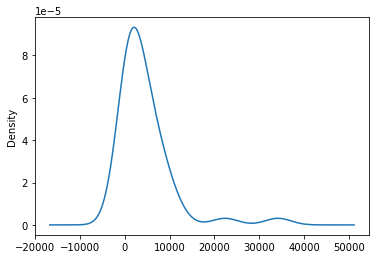

In [17]:
# Visualize the value counts of stateCnts
stateCnts.plot.density()

In [27]:
# Determine which values to replace if counts are less than ...?
# setting at 1000 since I saw SC less than 930 values

stateCnts_Other = stateCnts[stateCnts < 1000].index.tolist()

# Replace in dataframe
for app in stateCnts_Other:
    clean_df['state'] = clean_df['state'].replace(app,"Other")
    
# Check to make sure binning was successful
clean_df['state'].value_counts()

CA       34208
TX       22380
FL       11681
OH        9765
CO        9524
IL        8673
TN        8096
Other     8078
MO        7571
NC        6283
MI        6187
NJ        6142
VA        5987
GA        5387
PA        5336
AZ        5178
WA        4625
MN        4091
NY        3763
MA        2783
OR        2611
WI        2415
CT        2384
IN        2377
KS        2066
UT        2005
IA        1918
OK        1695
LA        1603
KY        1382
NM        1074
Name: state, dtype: int64

In [28]:
# Look at agency value counts for binning
agencyCnts = clean_df['agency'].value_counts()
agencyCnts

# It may be appropriate to EITHER: 
# 1. Bin Agencies 10-12 as "Other"
# OR 2. Focus on a couple of agencies against each other

Agency 3     81515
Agency 4     46424
Agency 2     42153
Agency 6     11383
Agency 8      5664
Agency 7      4090
Agency 5      3831
Agency 9      1645
Agency 10      557
Agency 11        5
Agency 12        1
Name: agency, dtype: int64

<AxesSubplot:ylabel='Density'>

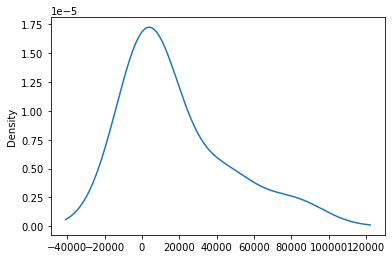

In [29]:
# Visualize the value counts of agencyCnts
agencyCnts.plot.density()

In [34]:
# Determine which values to replace if counts are less than ...?
# setting at 6000 since I want to focus on agency 3, 4, 2, 6

agencyCnts_Other = agencyCnts[agencyCnts < 6000].index.tolist()

# Replace in dataframe
for app in agencyCnts_Other:
    clean_df['agency'] = clean_df['agency'].replace(app,"Other")
    
# Check to make sure binning was successful
clean_df['agency'].value_counts()

Agency 3    81515
Agency 4    46424
Agency 2    42153
Other       15793
Agency 6    11383
Name: agency, dtype: int64

In [20]:
# Look at location_name value counts for binning
location_nameCnts = clean_df['location_name'].value_counts()
location_nameCnts

# It may be appropriate to EITHER: 
# 1. locations indicated as B3, ignored/binned as other

B1 - Troy                1254
B1 - Polaris             1252
B1 - Rockwall            1190
B1 - Los Gatos           1179
B1 - Lubbock             1140
                         ... 
B1 - West Kendall          11
B3 - South Tampa           11
B3 - Westlake Village       5
B1 - Raleigh Midtown        5
B3 - Lubbock                5
Name: location_name, Length: 472, dtype: int64

<AxesSubplot:ylabel='Density'>

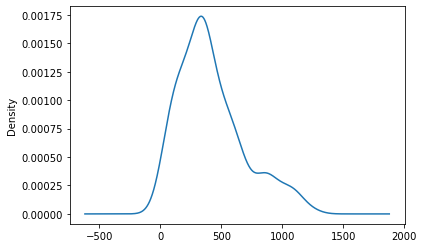

In [21]:
location_nameCnts.plot.density()

In [37]:
# Determine which values to replace if counts are less than ...?
# setting at 1000 since I want to focus on cities with more than 1000 data points

location_nameCnts_Other = location_nameCnts[location_nameCnts < 1000].index.tolist()

# Replace in dataframe
for app in location_nameCnts_Other:
    clean_df['location_name'] = clean_df['location_name'].replace(app,"Other")
    
# Check to make sure binning was successful
clean_df['location_name'].value_counts()

Other                    171916
B1 - Troy                  1254
B1 - Polaris               1252
B1 - Rockwall              1190
B1 - Los Gatos             1179
B1 - Lubbock               1140
B1 - Richmond Heights      1130
B1 - Creve Coeur           1127
B1 - Easton                1110
B1 - Fritz Farm            1104
B1 - Hyde Park             1100
B1 - Leawood               1098
B1 - Scottsdale 101        1097
B1 - Bearden               1097
B1 - West Nash             1084
B1 - Redmond TC            1083
B1 - Houston Heights       1076
B1 - McCormick Ranch       1062
B1 - Kenwood               1041
B1 - Fort Collins          1032
B1 - Robinson              1031
B1 - The Gulch             1030
B1 - Winston Salem         1027
B1 - Kildeer               1008
Name: location_name, dtype: int64

In [22]:
# Look at date_start value counts for binning
date_startCnts = clean_df['date_start'].value_counts()
date_startCnts

# It may be appropriate to EITHER: 
# 1. bin start dates 1/18/21 and before as other

4/23/2021    739
4/22/2021    729
4/24/2021    724
4/25/2021    722
4/21/2021    721
            ... 
1/18/2021    348
1/31/2021    347
1/17/2021    340
1/3/2021     322
1/2/2021     313
Name: date_start, Length: 365, dtype: int64

<AxesSubplot:ylabel='Density'>

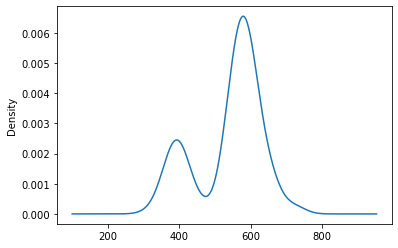

In [23]:
date_startCnts.plot.density()

In [38]:
# Determine which values to replace if counts are less than ...?
# setting at 350 to make other for 1/18/2021 or before

date_startCnts_Other = date_startCnts[date_startCnts < 350].index.tolist()

# Replace in dataframe
for app in date_startCnts_Other:
    clean_df['date_start'] = clean_df['date_start'].replace(app,"Other")
    
# Check to make sure binning was successful
clean_df['date_start'].value_counts()

Other        1670
4/23/2021     739
4/22/2021     729
4/24/2021     724
4/25/2021     722
             ... 
2/4/2021      359
2/6/2021      357
2/7/2021      355
1/30/2021     352
1/1/2021      351
Name: date_start, Length: 361, dtype: int64

In [24]:
# Look at campaign_id value counts for binning
campaign_idCnts = clean_df['campaign_id'].value_counts()
campaign_idCnts

# It may be appropriate to EITHER: 
# 1. bin Ids around 100 or less

2.380000e+16    191635
2.390000e+16       912
6.220000e+12       478
6.240000e+12       458
6.250000e+12       451
6.230000e+12       332
1.248033e+10       164
6.210000e+12       157
1.342492e+10       156
1.051919e+10       152
1.132644e+10       142
1.176240e+10       141
1.101654e+10       114
1.262135e+10       109
1.245405e+10       107
1.290236e+10       105
8.671577e+09       104
1.426462e+10        97
1.426434e+10        96
1.281866e+10        95
1.425457e+10        95
1.089396e+10        82
1.457369e+10        75
1.292047e+10        70
1.353365e+10        65
1.408462e+10        64
1.307231e+10        59
1.363449e+10        50
1.426384e+10        49
1.486476e+10        45
1.483325e+10        40
1.433742e+10        39
1.522565e+10        36
1.489613e+10        34
1.511714e+10        34
1.493365e+10        33
6.260000e+12        32
1.447983e+10        30
1.502780e+10        30
1.492585e+10        30
1.522224e+10        30
1.475648e+10        29
1.441913e+10        29
1.426442e+1

<AxesSubplot:ylabel='Density'>

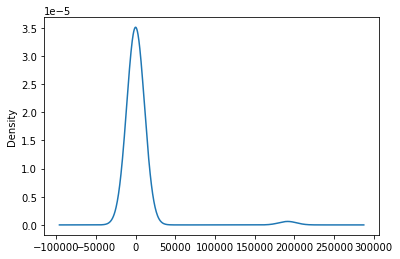

In [25]:
campaign_idCnts.plot.density()

In [41]:
# Determine which values to replace if counts are less than ...?
# setting at 100 to make other 

campaign_idCnts_Other = campaign_idCnts[campaign_idCnts < 350].index.tolist()

# Replace in dataframe
for app in campaign_idCnts_Other:
    clean_df['campaign_id'] = clean_df['campaign_id'].replace(app,"Other")
    
# Check to make sure binning was successful
clean_df['campaign_id'].value_counts()

2.38e+16           191635
Other                3334
2.39e+16              912
6220000000000.0       478
6240000000000.0       458
6250000000000.0       451
Name: campaign_id, dtype: int64

In [ ]:
# generagte cat variables

In [ ]:
# one hot encoder

In [ ]:
# merge dfs

# Split into train and test features

In [ ]:
# 

# Compile, Train, Evaluate our Model